In [1]:
# here we used a dataset that used building and site_id
import pandas as pd
import numpy as np
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import KFold

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [121]:
import pickle as pkl

In [4]:
# train has meter readings, which are obviously lacking in test set
train_df = pd.read_pickle("../data/processed/train_data.pkl")
#test_df = pd.read_pickle("../data/processed/test_data.pkl")
# train_df contains building and siteid
# then train_df.head(47592).hour shows 1983 times zero meaning these first
# rows are all first meter_readings taken
# so the dataset is ordered after times of meter_readings
# using then a 4fold not shuffled cv means that the one
# year of training data is split in 9 months train and 3 month test
# succesively: Jan-March and Apr-Dez for example
# note that some rows were dropped due to faulty meter readings
# also building 993 has outlier

In [5]:
train_df.head()

,building_id,meter,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,...,weekday,area_per_floor,outlier_square_feet,outlier_area_per_floor,air_temperature_6_lag,air_temperature_24_lag,dew_temperature_6_lag,dew_temperature_24_lag,cloud_coverage_6_lag,cloud_coverage_24_lag
0,0,0,0.000000,0,0,8.913550,11.0,NaN,19.406250,NaN,...,4,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN
1,1142,1,0.000000,13,6,11.549431,NaN,NaN,-7.199219,8.0,...,4,NaN,False,False,16.768229,18.847656,11.118490,10.296224,NaN,NaN
2,1142,0,48.000000,13,6,11.549431,NaN,NaN,-7.199219,8.0,...,4,NaN,False,False,17.519531,18.801758,11.302083,10.154460,NaN,NaN
3,1141,0,21.000000,13,8,9.951611,NaN,NaN,-7.199219,8.0,...,4,NaN,False,False,18.153646,18.660156,11.402344,9.991862,NaN,NaN
4,1140,2,6609.379883,13,0,11.960703,NaN,NaN,-7.199219,8.0,...,4,NaN,False,False,18.703125,18.518229,11.302083,9.783366,NaN,NaN


In [6]:
train_df.shape # (19229841, 26)
train_df.columns

Index(['building_id', 'meter', 'meter_reading', 'site_id', 'primary_use',
       'square_feet', 'year_built', 'floor_count', 'air_temperature',
       'cloud_coverage', 'dew_temperature', 'precip_depth_1_hr',
       'relative_humidity', 'air_temp_f', 'feels_like_temp', 'hour', 'weekday',
       'area_per_floor', 'outlier_square_feet', 'outlier_area_per_floor',
       'air_temperature_6_lag', 'air_temperature_24_lag',
       'dew_temperature_6_lag', 'dew_temperature_24_lag',
       'cloud_coverage_6_lag', 'cloud_coverage_24_lag'],
      dtype='object')

In [7]:
train_df.head(1984).hour #1982 meter readings of timepoint 1

0       0
1       0
2       0
3       0
4       0
       ..
1979    0
1980    0
1981    0
1982    0
1983    1
Name: hour, Length: 1984, dtype: category
Categories (24, int64): [0, 1, 2, 3, ..., 20, 21, 22, 23]

In [161]:
label = train_df.meter_reading
dummy_df = train_df

In [162]:
is_meter0 = (dummy_df.meter == 0).values
dummy_df = dummy_df.iloc[is_meter0,]
label = label.iloc[is_meter0,]
groups = dummy_df.building_id
gkf = GroupKFold(n_splits = 4)
indices = gkf.split(dummy_df, label, groups)

In [158]:
dummy_df.head()

,building_id,meter,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,...,weekday,area_per_floor,outlier_square_feet,outlier_area_per_floor,air_temperature_6_lag,air_temperature_24_lag,dew_temperature_6_lag,dew_temperature_24_lag,cloud_coverage_6_lag,cloud_coverage_24_lag
0,0,0,0.000000,0,0,8.913550,11.0,NaN,19.406250,NaN,...,4,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN
1,1142,0,48.000000,13,6,11.549431,NaN,NaN,-7.199219,8.0,...,4,NaN,False,False,17.519531,18.801758,11.302083,10.154460,NaN,NaN
2,1141,0,21.000000,13,8,9.951611,NaN,NaN,-7.199219,8.0,...,4,NaN,False,False,18.153646,18.660156,11.402344,9.991862,NaN,NaN
3,1140,0,464.627014,13,0,11.960703,NaN,NaN,-7.199219,8.0,...,4,NaN,False,False,20.286458,18.193034,10.834635,9.416504,NaN,NaN
4,1139,0,1350.209961,13,6,12.726799,NaN,NaN,-7.199219,8.0,...,4,NaN,False,False,23.067708,17.688151,9.882812,8.674642,NaN,NaN


In [10]:
keep = [[0,0], [0,0], [0,0], [0,0]]

In [11]:
for i, (train_index, test_index) in enumerate(indices):
    print("TRAIN:", train_index, "TEST", test_index)
    keep[i][0] = train_index
    keep[i][1] = test_index

TRAIN: [       0        2        3 ... 11527362 11527363 11527364] TEST [       1        7       13 ... 11527352 11527357 11527361]
TRAIN: [       0        1        3 ... 11527362 11527363 11527364] TEST [       2        4        8 ... 11527355 11527356 11527360]
TRAIN: [       1        2        4 ... 11527360 11527361 11527362] TEST [       0        3        9 ... 11527350 11527363 11527364]
TRAIN: [       0        1        2 ... 11527361 11527363 11527364] TEST [       5        6       10 ... 11527358 11527359 11527362]


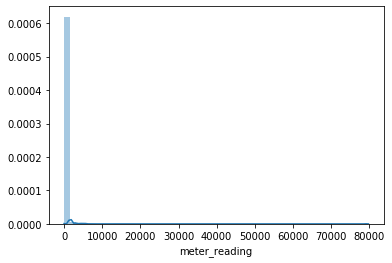

In [13]:
# Fold 1
# max(dummy_df.meter_reading.iloc[keep[0][0]]) over 70000
sns.distplot(dummy_df.meter_reading.iloc[keep[0][0]])

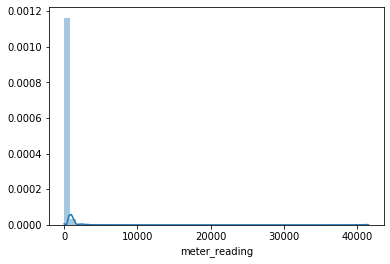

In [16]:
# max(dummy_df.meter_reading.iloc[keep[0][1]]) 41552.0
sns.distplot(dummy_df.meter_reading.iloc[keep[0][1]])

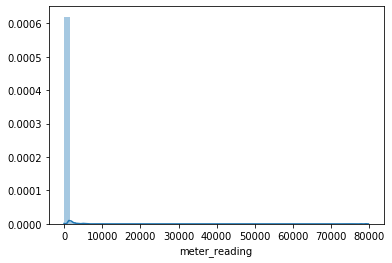

In [39]:
# Fold 2
# max(dummy_df.meter_reading.iloc[keep[0][1]])  41552.0
sns.distplot(dummy_df.meter_reading.iloc[keep[1][0]])

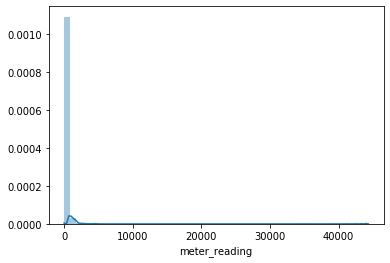

In [52]:
# max(dummy_df.meter_reading.iloc[keep[1][1]])  44336.5
sns.distplot(dummy_df.meter_reading.iloc[keep[1][1]])

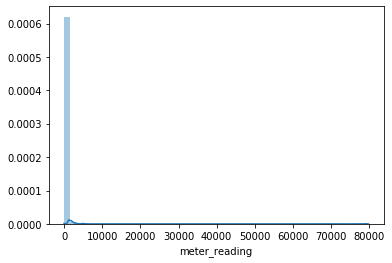

In [56]:
# Fold 3
# max(dummy_df.meter_reading.iloc[keep[2][0]]) 79769.0
sns.distplot(dummy_df.meter_reading.iloc[keep[2][0]])

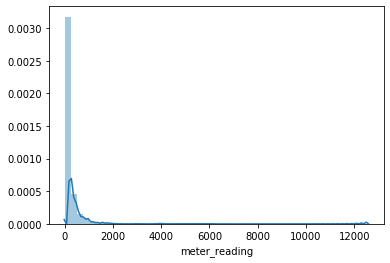

In [58]:
# max(dummy_df.meter_reading.iloc[keep[2][1]]) 12571
sns.distplot(dummy_df.meter_reading.iloc[keep[2][1]])

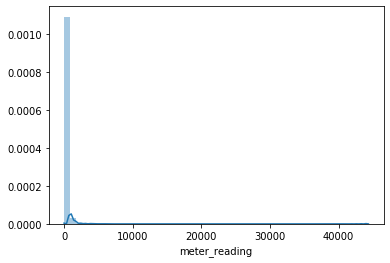

In [60]:
# Fold 4 
# max(dummy_df.meter_reading.iloc[keep[3][0]]) 44336.5
sns.distplot(dummy_df.meter_reading.iloc[keep[3][0]])

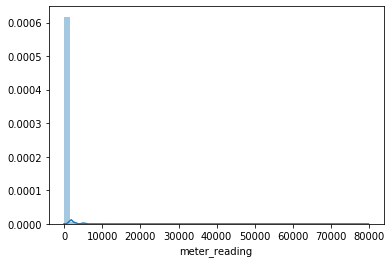

In [62]:
# max(dummy_df.meter_reading.iloc[keep[3][1]]) 79769.0
sns.distplot(dummy_df.meter_reading.iloc[keep[3][1]])

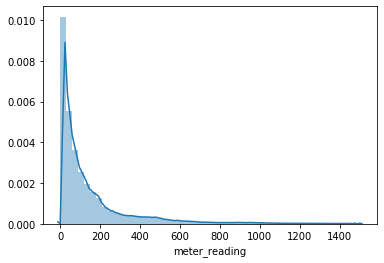

In [19]:
sns.distplot(dummy_df.meter_reading[dummy_df.meter_reading < 1500])

In [37]:
max(dummy_df.meter_reading) #79769.0

79769.0

In [54]:
max(train_df.meter_reading)

880374.0

In [51]:
np.where(dummy_df.meter_reading == max(dummy_df.meter_reading))

(array([9038471], dtype=int64),)

In [52]:
dummy_df.iloc[9038471,]

building_id                   993
meter                           0
meter_reading               79769
site_id                         9
primary_use                     0
square_feet               12.9684
year_built                    NaN
floor_count                   NaN
air_temperature           23.9062
cloud_coverage                NaN
dew_temperature           22.2031
precip_depth_1_hr               0
relative_humidity         90.2136
air_temp_f                     75
feels_like_temp           23.8889
hour                            7
weekday                         0
area_per_floor                NaN
outlier_square_feet         False
outlier_area_per_floor      False
air_temperature_6_lag     14.7982
air_temperature_24_lag    21.1084
dew_temperature_6_lag     12.5833
dew_temperature_24_lag    11.2799
cloud_coverage_6_lag          NaN
cloud_coverage_24_lag         NaN
Name: 15120918, dtype: object

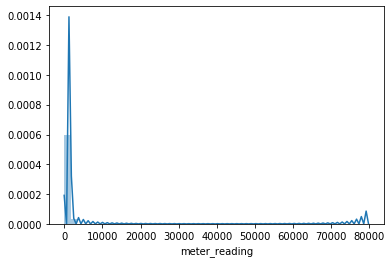

In [56]:
sns.distplot(dummy_df[dummy_df.building_id == 993].meter_reading)